In [1]:
import pandas as pd
import operator as op
import collections
import klcalculator

import matplotlib.pyplot as plt
import numpy as np

In [2]:
features = ['gender', 'AGE', 'POSTCODE', 'blood_group', 'eye_color', 'job']
data = pd.read_csv('our-synthetic.csv')[features]
data = data.fillna('Unemployed')
dataset = list(zip(*(data[fn].tolist() for fn in features)))

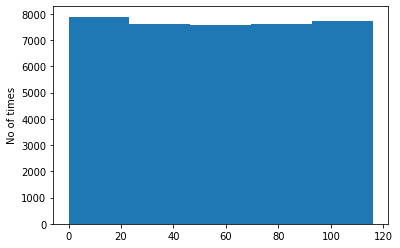

In [3]:
plt.hist(data['AGE'], bins=5)
plt.ylabel('No of times')
plt.show()

In [4]:
def calculate_utility(round_factor):
    # This function calculates the utility factor of the aggregated Age variable.
    # Aggregation is done by rounding age values to ranges of (round_factor) years.
    
    # Create one base case (ds1) and another dataset with an aggregation of age
    ds1 = klcalculator.aggregate(dataset, {1: lambda age: age // 1}) # base case with no aggregation
    ds2 = klcalculator.aggregate(dataset, {1: lambda age: round_factor* (age // round_factor)}) # aggregation to (round_factor) year ranges

    ffs1 = tuple(map(op.itemgetter(1), ds1)) # AGE at column #1
    ffs2 = tuple(map(op.itemgetter(1), ds2))
    
    fd1 = klcalculator.calculate_distribution(ffs1)
    fd2 = klcalculator.calculate_distribution(ffs2)
    
    return klcalculator.calculate_kl(fd2, fd1)

In [5]:
mylist=[]
for n in list(range(1, 21)):
    u = calculate_utility(n)
    print ("Base case vs aggregation to ", n, "-year groupings:", 'Utility Factor is %.5f' % u)
    mylist.append([n,u])

Base case vs aggregation to  1 -year groupings: Utility Factor is 0.00000
Base case vs aggregation to  2 -year groupings: Utility Factor is 1.00932
Base case vs aggregation to  3 -year groupings: Utility Factor is 1.56903
Base case vs aggregation to  4 -year groupings: Utility Factor is 2.00683
Base case vs aggregation to  5 -year groupings: Utility Factor is 2.32519
Base case vs aggregation to  6 -year groupings: Utility Factor is 2.56909
Base case vs aggregation to  7 -year groupings: Utility Factor is 2.77184
Base case vs aggregation to  8 -year groupings: Utility Factor is 2.98617
Base case vs aggregation to  9 -year groupings: Utility Factor is 3.19207
Base case vs aggregation to  10 -year groupings: Utility Factor is 3.29338
Base case vs aggregation to  11 -year groupings: Utility Factor is 3.43307
Base case vs aggregation to  12 -year groupings: Utility Factor is 3.54984
Base case vs aggregation to  13 -year groupings: Utility Factor is 3.66746
Base case vs aggregation to  14 -y

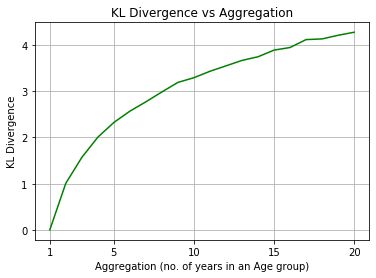

In [6]:
import matplotlib.pyplot as plt
plt.plot([item[0] for item in mylist], [item[1] for item in mylist], color='g')
plt.xlabel('Aggregation (no. of years in an Age group)')
plt.ylabel('KL Divergence')
plt.title('KL Divergence vs Aggregation')
plt.xticks([1,5,10,15,20])
plt.grid(b=None, which='major', axis='both')
plt.show()